### Init

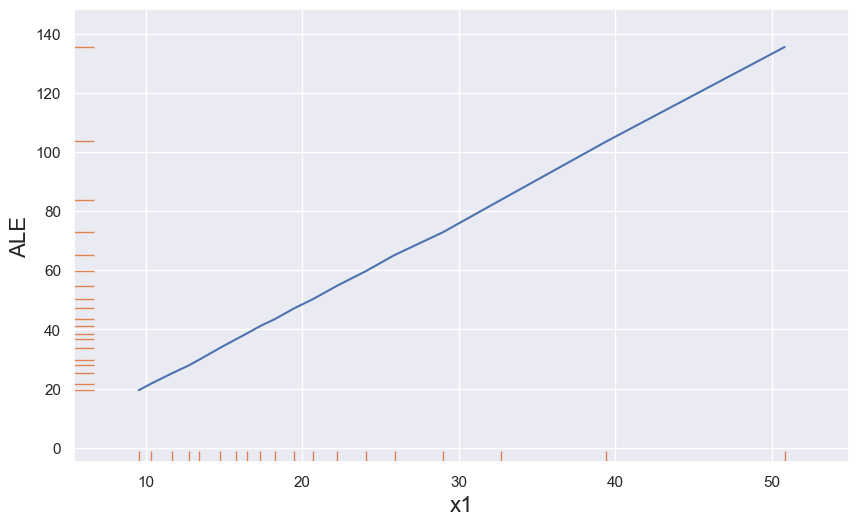

In [3]:
%reload_ext autoreload
%autoreload 2

import sys,os, time, math
import pandas as pd
import numpy as np
sys.path.insert(1, '../../')
from getting_data import load_sample
from s2search_score_ale import divide_by_percentile, get_ale

# 1 order
# df = load_sample('pdp-exp1', 'cslg-rand-100', sort='year')

# df
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

df = df.drop(['sex', 'smoker', 'day', 'time', 'size'], axis=1)

def fn(x1, x2):
    return 3 * x1 + 5 * math.pow(x2, 3)

fe_key = 'total_bill'

df = df.sort_values(by=[fe_key])

grids, quantiles = divide_by_percentile(df, fe_key, 5)

# idx_list = []

# for grid in grids:
#     print(grid['lower_z'], grid['upper_z'])
#     for index, row in grid['neighbor'].iterrows():
#         idx_list.append(index)
#         print('--- ', row['total_bill'], row['tip'])
#     break

# print(len(df.index), list(df.index))
# print(len(idx_list), idx_list)

def fn_over_grid_1(points_ul_pairs):
    diff_list = []
    for point_pair in points_ul_pairs:
        upper, lower = point_pair
        upper_outcome = fn(upper['total_bill'], upper['tip'])
        lower_outcome = fn(lower['total_bill'], lower['tip'])
        diff_list.append(upper_outcome - lower_outcome)
    
    return diff_list

ale_result_list = get_ale(grids, fe_key, fn_over_grid_1)

d = {'ale': ale_result_list, 'quantile': quantiles}
dff = pd.DataFrame(data=d)

plt.figure(figsize=(10,6), dpi=100)
plt.xlabel('x1',fontsize=16)
plt.ylabel('ALE', fontsize=16)
# sns.kdeplot(data=dff, x ="quantile", y='ale')
sns.lineplot(data=dff, x ="quantile",y="ale")
sns.rugplot(data=dff, x ="quantile", y='ale')
plt.show()